In [3]:
import importlib
import utilsHannes as utilsH

from nuscenes import NuScenes
from nuscenes.prediction import PredictHelper

from nuscenes.eval.prediction.splits import get_prediction_challenge_split

import matplotlib.pyplot as plt
%matplotlib inline


/opt/conda/envs/flowerNuscenes/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: /opt/conda/envs/flowerNuscenes/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZNK3c1010TensorImpl36is_contiguous_nondefault_policy_implENS_12MemoryFormatE
  warn(f"Failed to load image Python extension: {e}")


In [18]:
# importlib.reload(utilsH)

# version = "v1.0-mini"
# DATAROOT = "data/sets/nuscenes"
# subset = "mini_train"
# seconds_of_history_used = 2.0
# mini_train = get_prediction_challenge_split('mini_train', dataroot=DATAROOT)
# data_set = mini_train
# sequences_per_instance = "non_overlapping_sequences_per_instance" # one_sequences_per_instance, non_overlapping_sequences_per_instance, all_sequences_per_instance

# # --------------------------------------------------------------------------
# # Use get_and_format_data as a wrapping function:
# img_list, img_tensor_list, agent_state_vector_list, future_xy_local_list = utilsH.get_and_format_data(version, DATAROOT, subset, seconds_of_history_used)

# print(img_tensor_list[0])
# print(agent_state_vector_list[0])
# print(future_xy_local_list[0])



importlib.reload(utilsH)

version = "v1.0-mini" # v1.0-mini, v1.0-trainval
if version == "v1.0-mini":
    train_subset = "mini_train"
    val_subset = "mini_val"
elif version == "v1.0-trainval":
    train_subset = "train"
    val_subset = "val"
     
DATAROOT = "data/sets/nuscenes"
seconds_of_history_used = 1.0 # Half second steps
sequences_per_instance = "one_sequences_per_instance" # one_sequences_per_instance, non_overlapping_sequences_per_instance, all_sequences_per_instance
   

# Get training data
img_list1, img_tensor_list1, agent_state_vector_list1, future_xy_local_list1 = utilsH.get_and_format_data(version, DATAROOT, train_subset, seconds_of_history_used, "one_sequences_per_instance")
img_list2, img_tensor_list2, agent_state_vector_list2, future_xy_local_list2 = utilsH.get_and_format_data(version, DATAROOT, train_subset, seconds_of_history_used, "non_overlapping_sequences_per_instance")
img_list3, img_tensor_list3, agent_state_vector_list3, future_xy_local_list3 = utilsH.get_and_format_data(version, DATAROOT, train_subset, seconds_of_history_used, "all_sequences_per_instance")



Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.429 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
Before remove_short_sequences:
        unique_instance_tokens = 742
        unique_sample_tokens = 742
After remove_short_sequences:
        unique_instance_tokens = 736
        unique_sample_tokens = 736
After extract_one_instance_per_sequence:
        unique_instance_tokens = 62
        unique_sample_tokens = 62
Starting get_data_and_ground_truth
End of get_data_and_ground_truth
Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.353 seconds.
Reverse indexing ...
Done rev

In [3]:
# importlib.reload(utilsH)

# version = "v1.0-mini"
# DATAROOT = "data/sets/nuscenes"
# subset = "mini_train"

# # --------------------------------------------------------------------------
# # Use the sub-functions directly:
# nuscenes = NuScenes('v1.0-mini', dataroot=DATAROOT)
# mini_train = get_prediction_challenge_split('mini_train', dataroot=DATAROOT)
# helper = PredictHelper(nuscenes)

# # # FOR SMALL TEST:
# # data_set = mini_train[:50]
# # else:
# data_set = mini_train

# seconds_of_history_used = 1.5

# instance_token_list, sample_token_list = utilsH.get_instance_tokens_and_sample_tokens(data_set)

# instance_token_list, sample_token_list = utilsH.remove_short_sequences(seconds_of_history_used, instance_token_list, sample_token_list)

# instance_token_list, sample_token_list = utilsH.extract_one_instance_per_sequence(seconds_of_history_used, instance_token_list, sample_token_list)

# img_list, agent_state_vector_list, future_xy_local_list = utilsH.get_data_and_ground_truth(nuscenes, helper, seconds_of_history_used, instance_token_list, sample_token_list)

# img_tensor_list = utilsH.create_img_tensor(img_list)

# print(f"agent_state_vector at index {test_index}: {agent_state_vector_list1[test_index]}")
# print(f"future_xy_local at index {test_index}:")
# print(future_xy_local_list[test_index])

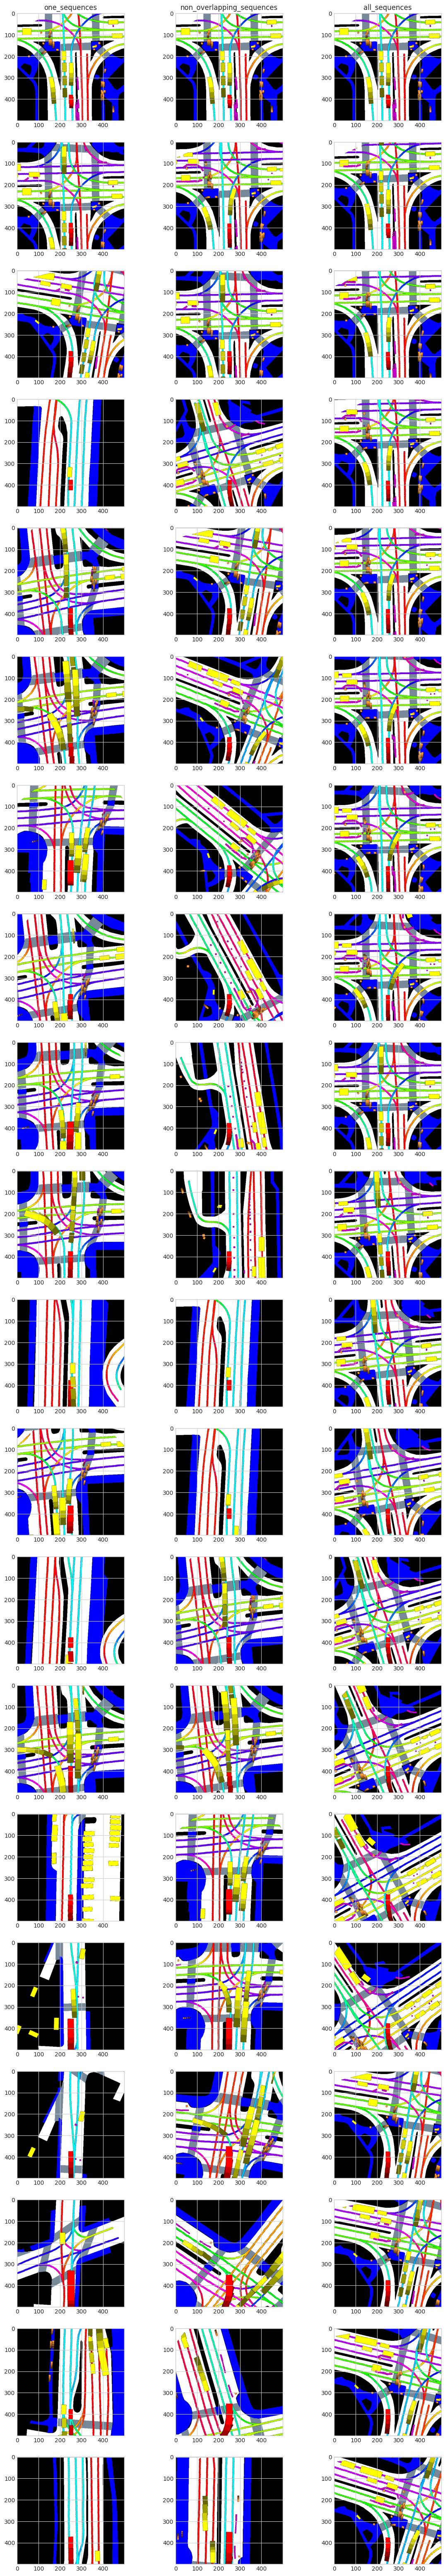

In [17]:
# Test objects for specific index

length = 20
test_index = range(length) #Den ser ut att bryta mellan 108 och 109 exempelvis

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(length, 3, figsize=(14, 4*length))

for i in test_index:
    # Plot the first image on the first subplot
    axes[i][0].imshow(img_list1[i])
    
    # Plot the second image on the second subplot
    axes[i][1].imshow(img_list2[i])
    
    # Plot the third image on the third subplot
    axes[i][2].imshow(img_list3[i])
   
# Display the plots
axes[0][0].set_title('one_sequences')
axes[0][1].set_title('non_overlapping_sequences')
axes[0][2].set_title('all_sequences')


plt.show()




In [5]:
importlib.reload(utilsH)

## Create video

# output_filename = 'test_output_video_2fps_dt2_50.avi'
output_filename = f'test_output_video_2fps_length_{len(img_list)}.avi'#Daniel
utilsH.create_video(img_list, output_filename, fps=2)

In [6]:
from nuscenes.prediction.models.backbone import ResNetBackbone
from nuscenes.prediction.models.mtp import MTP
# from nuscenes.prediction.models.covernet import CoverNet
# from nuscenes.prediction.models.covernet import ConstantLatticeLoss

from utilsHannes import CoverNetNoRelu

import torch

backbone = ResNetBackbone('resnet50')
mtp = MTP(backbone, num_modes=2)

# Note that the value of num_modes depends on the size of the lattice used for CoverNet.
covernet = CoverNetNoRelu(backbone, num_modes=64)

In [7]:
test_index = 46

covernet.requires_grad_(True)
logits = covernet(img_tensor_list[test_index], agent_state_vector_list[test_index])

sofmaxy = torch.nn.Softmax(dim=1)
outputy = sofmaxy(logits)
print(logits)
print(torch.sum(outputy).item())
print(outputy.detach())

tensor([[ 6.0883e-01,  3.1326e-01, -1.5930e-01, -3.5829e-01,  9.1852e-01,
          5.7826e-02,  5.6720e-01, -8.9564e-01, -6.9027e-01,  4.6193e-02,
          1.7457e-01, -4.4497e-01,  5.0402e-01, -1.0151e-01, -2.2187e-02,
         -5.2079e-01,  1.1026e-01, -7.9884e-02,  7.7987e-02, -7.9117e-04,
          1.9269e-01,  1.9124e-01, -1.0040e-01,  3.1169e-01, -2.6342e-01,
          1.6309e-01,  3.9183e-01,  3.7214e-02, -2.4716e-03, -1.4264e-01,
         -7.3342e-01,  6.4447e-02, -6.3643e-02, -2.9319e-01,  3.2444e-01,
          7.1238e-02, -4.7633e-01,  7.8322e-02,  4.4713e-01,  2.1756e-02,
          3.6805e-01, -3.2826e-01, -2.2507e-01, -5.6470e-02, -1.4844e-01,
         -1.8456e-01,  2.7546e-02,  7.1555e-01, -9.9381e-02, -3.8530e-01,
          4.3544e-01, -3.5022e-01,  9.3012e-02, -3.3312e-01, -1.2600e-01,
         -1.7679e-01, -5.4514e-01, -2.9215e-01, -7.9657e-02,  1.3689e-01,
         -4.3006e-01,  7.3843e-02,  6.6722e-02,  7.3857e-02]],
       grad_fn=<AddmmBackward0>)
0.99999988079071

In [8]:
import pickle

#Epsilon is the amount of coverage in the set, 
#i.e. a real world trajectory is at most 8 meters from a trajectory in this set
#We released the set for epsilon = 2, 4, 8. Consult the paper for more information
#on how this set was created

#PATH_TO_EPSILON_8_SET = "/data/sets/nuscenes-prediction-challenge-trajectory-sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_8.pkl"
PATH_TO_EPSILON_8_SET = "data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_8.pkl"
trajectories = pickle.load(open(PATH_TO_EPSILON_8_SET, 'rb'))

#Saved them as a list of lists
trajectories = torch.Tensor(trajectories)

# Hannes kommenterar bort
#Print 5 most likely predictions
# print(trajectories[logits.argsort(descending=True)[:1]])



# Hannes 
newTraj = trajectories[logits.argsort(descending=True)[:1]]
print(newTraj)

tensor([[[[-2.4342e-02,  6.0260e+00],
          [-1.0404e-01,  1.1295e+01],
          [-9.2170e-02,  1.7083e+01],
          ...,
          [ 3.6829e-01,  5.7070e+01],
          [ 2.6024e-01,  6.3046e+01],
          [ 7.5568e-02,  6.9022e+01]],

         [[ 4.2528e-01,  2.0504e+00],
          [ 8.8937e-01,  4.0255e+00],
          [ 1.9923e+00,  6.6700e+00],
          ...,
          [ 1.5433e+01,  2.2016e+01],
          [ 1.6212e+01,  2.2823e+01],
          [ 1.6868e+01,  2.3410e+01]],

         [[ 4.4409e-16,  1.9426e+00],
          [ 3.7444e-02,  3.4844e+00],
          [ 6.7399e-02,  4.7179e+00],
          ...,
          [ 1.4167e-01,  7.7640e+00],
          [ 1.4484e-01,  7.8999e+00],
          [ 1.4855e-01,  8.0349e+00]],

         ...,

         [[ 4.6056e-02,  3.6988e+00],
          [ 3.4553e-01,  6.9963e+00],
          [ 8.5752e-01,  1.0285e+01],
          ...,
          [ 1.0942e+01,  2.8339e+01],
          [ 1.3190e+01,  3.0253e+01],
          [ 1.5600e+01,  3.1961e+01]],

     

Shape of set of all trajectories = (64, 12, 2)


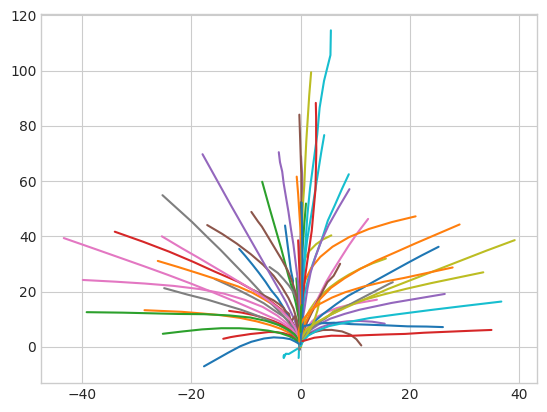

predictedProbabilities = [0.00614629 0.00722879 0.00754747 0.00872632 0.00894145 0.00934798
 0.00964578 0.00979063 0.01023881 0.0105192  0.01060442 0.01078726
 0.01083979 0.01122674 0.01123838 0.01156599 0.01201816 0.01251503
 0.01261259 0.01283509 0.01297526 0.0130508  0.01326976 0.01359875
 0.01361391 0.01362772 0.01389604 0.01389919 0.01412356 0.01422523
 0.01472137 0.01501449 0.01503975 0.0153827  0.01547202 0.01562233
 0.01576323 0.01594768 0.01605362 0.01609019 0.01616301 0.01620518
 0.0162054  0.01627247 0.01627791 0.0165188  0.01680622 0.01725969
 0.01771799 0.01792254 0.01822387 0.01825029 0.02055652 0.02058871
 0.02082026 0.02174828 0.02227182 0.02326448 0.02353809 0.02491588
 0.02654103 0.02766914 0.03078525 0.03771326]
predictedProbabilitiesIndices = [ 7 30  8 56 15 36 11 60 49  3 51 53 41 33 57 24 42 45 55  2 44 29 54 13
 22 48 17 58 32 43 14 28 19 39 46 27  9  5 31 62 35 61 63 18 37 52 16 59
 25 10 21 20 23  1 34 40 26 50 38 12  6  0 47  4]
topProbabilitiesIndices = [ 4 4

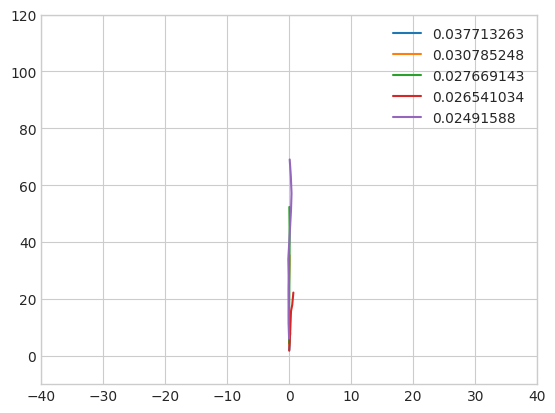

In [9]:
# Hannes cell
import numpy as np

### Choose which trajectory sets to use 
# with open('data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_2.pkl', 'rb') as f:
#     data = pickle.load(f)
# with open('data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_4.pkl', 'rb') as f:
#     data = pickle.load(f)
with open('data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_8.pkl', 'rb') as f:
    data = pickle.load(f)

allTrajectories = np.array(data)
print(f"Shape of set of all trajectories = {allTrajectories.shape}")

### Plot all trajectories
modes = np.arange(allTrajectories.shape[0])
timesteps = np.arange(12) # 12 timesteps (which is maximum), can be reduced
for mode in modes:
    plt.plot(allTrajectories[mode,timesteps,0],allTrajectories[mode,timesteps,1])
plt.show()


### Plot selected trajectories
numbersOfDisplayedProbabilities = 5
# topPredictedTrajectories = allTrajectories[logits.argsort(descending=True)[0][:numbersOfDisplayedProbabilities]] # Choose top 5 predictions
topPredictedTrajectories = allTrajectories[outputy.argsort(descending=True)[0][:numbersOfDisplayedProbabilities]] # Choose top 5 predictions

# print(allTrajectories)
# print(f"outputy.argsort(descending=True)[0][:numbersOfDisplayedProbabilities] = {outputy.argsort(descending=True)[0][:numbersOfDisplayedProbabilities]}")
# print(topPredictedTrajectories)
# predictedProbabilities = outputy[0][outputy.argsort(descending=True)[0][:5]]

# tmpOutputy = outputy.detach().clone()
# print(tmpOutputy)
# predictedProbabilities = []
# for topPrediction in range(numbersOfDisplayedProbabilities):
#     predictedProbabilitiesIndex = [tmpOutputy.argmax()]
#     print(predictedProbabilitiesIndex)
#     tmpOutputy[0][predictedProbabilitiesIndex] = 0
#     predictedProbabilities.append(predictedProbabilitiesIndex)

## TO GET INDICES
outputyValues = outputy.detach().numpy().squeeze()
predictedProbabilitiesIndices = np.argsort(outputyValues)
predictedProbabilities = outputyValues[predictedProbabilitiesIndices]
# topProbabilitiesIndices = predictedProbabilities[0][::-1][0:numbersOfDisplayedProbabilities]
topProbabilitiesIndices = predictedProbabilitiesIndices[::-1][0:numbersOfDisplayedProbabilities]
# predictedProbabilities = outputy.argsort(descending=True)
# topProbabilities = predictedProbabilities[0][0:5]
# topProbabilities = topProbabilitiesIndices

# print(outputyValues)
## TO GET VALUES 
topProbabilities = []
for index in topProbabilitiesIndices:
    topProbabilities.append(outputyValues[index])


# print(f"outputy = {outputy}")
print(f"predictedProbabilities = {predictedProbabilities}")
print(f"predictedProbabilitiesIndices = {predictedProbabilitiesIndices}")
print(f"topProbabilitiesIndices = {topProbabilitiesIndices}")
print(f"topProbabilities = {topProbabilities}")
print(f"Shape of top predicted trajectories = {topPredictedTrajectories.shape}")
modes2 = np.arange(topPredictedTrajectories.shape[0])
# timesteps = np.arange(12)
for mode in modes2:
    plt.plot(allTrajectories[mode,timesteps,0],allTrajectories[mode,timesteps,1])
plt.ylim([-10,120])
plt.xlim([-40,40])
# plt.legend(["1th prediction", "2nd prediction", "3rd prediction", "4th prediction", "5th prediction"])
plt.legend(topProbabilities)
plt.show()


# Test line for pushing, again


In [10]:
# GPT with covernet input

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from nuscenes.prediction.models.backbone import ResNetBackbone
from nuscenes.prediction.models.mtp import MTP
# from nuscenes.prediction.models.covernet import CoverNet

importlib.reload(utilsH)
from utilsHannes import CoverNetNoRelu
from nuscenes.prediction.models.covernet import ConstantLatticeLoss
from nuscenes.prediction.models.covernet import mean_pointwise_l2_distance


version = "v1.0-trainval" # v1.0-mini, v1.0-trainval
DATAROOT = "data/sets/nuscenes"
subset = "train" #One of 'mini_train', 'mini_val', 'train', 'val'.
seconds_of_history_used = 2.0

# --------------------------------------------------------------------------
# Use get_and_format_data as a wrapping function:
img_list, img_tensor_list, agent_state_vector_list, future_xy_local_list = utilsH.get_and_format_data(version, DATAROOT, subset, seconds_of_history_used)

#################################################################################################################################
# Define your custom dataset class that inherits from torch.utils.data.Dataset
class NuscenesDataset(Dataset):
    def __init__(self, image_data, agent_state_data, ground_truth_data):
        self.image_data = image_data
        self.agent_state_data = agent_state_data
        self.ground_truth_data = ground_truth_data
        
    def __len__(self):
        return len(self.image_data)
    
    def __getitem__(self, index):
        image_data_item = self.image_data[index]
        agent_state_data_item = self.agent_state_data[index]
        ground_truth_data_item = self.ground_truth_data[index]
        
        return image_data_item, agent_state_data_item, ground_truth_data_item

#################################################################################################################################


Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 35.665 seconds.
Reverse indexing ...
Done reverse indexing in 9.0 seconds.


In [11]:
# Prints
num_datapoints = len(img_tensor_list)
print(f"num_datapoints = {num_datapoints}")
print(f"img_tensor_list = {img_tensor_list[0].size()}")
print(f"agent_state_vector_list = {agent_state_vector_list[0]}")
print(f"future_xy_local_list = {future_xy_local_list[0][0]}")

# For testing
short_size = 100
short_img_tensor_list = img_tensor_list[:short_size]
short_agent_state_vector_list = agent_state_vector_list[:short_size]
short_future_xy_local_list = future_xy_local_list[:short_size]

# Prints
num_datapoints = len(short_img_tensor_list)
print(f"short_num_datapoints = {num_datapoints}")

# Define your dataset
dataset = NuscenesDataset(img_tensor_list, agent_state_vector_list, future_xy_local_list)
shortDataset = NuscenesDataset(short_img_tensor_list, short_agent_state_vector_list, short_future_xy_local_list)

# Instantiate your dataloader
batch_size = 10 # 32
shuffle = True # Set to True if you want to shuffle the data
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
shortDataloader = DataLoader(shortDataset, batch_size=batch_size, shuffle=shuffle)

# Initialize the CoverNet model
backbone = ResNetBackbone('resnet50') 
num_modes = 64 # 2206, 415, 64
covernet = CoverNetNoRelu(backbone, num_modes)



# Lattice and similarity function
traj_epsilon = 8
with open(f'data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_{traj_epsilon}.pkl', 'rb') as f:
    latticeData = pickle.load(f)
lattice = np.array(latticeData) # a numpy array of shape [num_modes, n_timesteps, state_dim]
print(f"latticeSize = {len(lattice[0])}")
similarity_function = mean_pointwise_l2_distance  # You can also define your own similarity function

# Define your loss function and optimizer
loss_function = ConstantLatticeLoss(lattice, similarity_function)
lr = 1e-4 # From Covernet paper: fixed learning rate of 1e−4
optimizer = optim.Adam(covernet.parameters(), lr=lr)  # Replace <YOUR_LEARNING_RATE> with your desired learning rate

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
covernet.to(device)

# Training loop
num_epochs = 100  # Replace <YOUR_NUM_EPOCHS> with the number of epochs you want to train for
for epoch in range(num_epochs):
    epochLoss = 0
    for batchCount, batch in enumerate(shortDataloader):

        # Get batch data
        image_tensor, agent_state_vector, ground_truth_trajectory = batch
        image_tensor = image_tensor.to(device)
        agent_state_vector = agent_state_vector.to(device)
        ground_truth_trajectory = ground_truth_trajectory.to(device)

        # print(f"image_tensor before squeeze = {image_tensor.size()}")
        image_tensor = torch.squeeze(image_tensor, dim=1)
        # print(f"image_tensor after squeeze = {image_tensor.size()}")

        # print(f"agent_state_vector before squeeze = {agent_state_vector.size()}")
        agent_state_vector = torch.squeeze(agent_state_vector, dim=1)
        # print(f"agent_state_vector after squeeze = {agent_state_vector.size()}")
        
        # print(f"ground_truth_trajectory before squeeze = {ground_truth_trajectory.size()}")
        # ground_truth_trajectory = torch.squeeze(ground_truth_trajectory, dim=1)
        # print(f"ground_truth_trajectory after squeeze = {ground_truth_trajectory.size()}")


        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        logits = covernet(image_tensor, agent_state_vector)

        # Compute loss
        loss = loss_function(logits, ground_truth_trajectory)

        # Backward pass
        loss.backward()
        optimizer.step()
        epochLoss += loss.item()



        # Print loss for this batch
        # print(f"Batch [{batchCount+1}/{int(num_datapoints/batch_size)+1}], Batch Loss: {loss.item():.4f}")
     
    # Print loss for this batch
    print(f"Epoch [{epoch+1}/{num_epochs}], Epoch Loss: {epochLoss:.4f}")


    # Optionally, you can evaluate the model after each epoch
    # by running inference on a validation set and computing relevant metrics

# Training complete
print("Training complete!")


num_datapoints = 2186
img_tensor_list = torch.Size([1, 3, 500, 500])
agent_state_vector_list = tensor([[ 4.8724, -0.0078, -0.0087]])
future_xy_local_list = [-0.00882741  1.51356238]
short_num_datapoints = 100
latticeSize = 12
Epoch [1/100], Epoch Loss: 43.0866
Epoch [2/100], Epoch Loss: 35.8764
Epoch [3/100], Epoch Loss: 30.9112
Epoch [4/100], Epoch Loss: 29.3883
Epoch [5/100], Epoch Loss: 26.3199
Epoch [6/100], Epoch Loss: 24.7981
Epoch [7/100], Epoch Loss: 23.5984
Epoch [8/100], Epoch Loss: 22.8004
Epoch [9/100], Epoch Loss: 21.3667
Epoch [10/100], Epoch Loss: 18.4414
Epoch [11/100], Epoch Loss: 17.1873
Epoch [12/100], Epoch Loss: 17.2304
Epoch [13/100], Epoch Loss: 15.7622
Epoch [14/100], Epoch Loss: 14.7706
Epoch [15/100], Epoch Loss: 12.1389
Epoch [16/100], Epoch Loss: 13.1049
Epoch [17/100], Epoch Loss: 14.0172
Epoch [18/100], Epoch Loss: 12.9842
Epoch [19/100], Epoch Loss: 11.2863
Epoch [20/100], Epoch Loss: 12.8531
Epoch [21/100], Epoch Loss: 9.8092
Epoch [22/100], Epoch Loss: 

In [12]:
# Forward pass
logits = covernet(image_tensor, agent_state_vector)
logits

tensor([[ -5.2442,   5.6932,  -5.8782,   9.8008,  -2.1464,  -2.8417, -13.5643,
          -2.9142,  -2.4796,  -3.2891,   9.6003,  -0.0525,  -2.0732, -12.0528,
          -5.0387,  -0.7042,  -2.5794,   3.9911,  -2.8117,   5.6531,  -2.4201,
          -2.7011,   7.4833,  -2.2101,  -9.3583,   3.4746,  -2.5665,  -3.4473,
           6.4572,  -2.3714,   9.7093,  -2.9281,  -3.3262,  -2.7611,  -2.8211,
          -2.3509,   9.7452,  -5.8328,  -2.6214,  -2.3520,  -3.2199,  -2.5952,
          -2.2419,  -0.2288,  -2.5168,  -2.6460,  -3.0741,   4.9724,  -2.8883,
          -2.4313,  -2.4414,  -2.2582,  -2.7258,  -2.1962,  18.0889,  -2.5841,
          -2.9615,  -5.6371,   0.3902,  -2.6203,  -2.9506,  -2.4495,  -1.2594,
          -2.4171],
        [  0.2774,  -8.6804,  -0.2544,   0.8266,  -2.4642,  -2.3886,   4.1321,
          -2.8043,   2.3712,   0.7574,  -8.1885,  -3.2555,   6.7029,   1.0720,
          -2.1789,   5.2876,  -3.2443,  20.2648,  -3.3188,  -6.9835,  -2.6970,
          -2.2869,  -4.8792,  -3

In [13]:
# Test utilsHannes.py functions

import importlib
import utilsHannes as utilsH
importlib.reload(utilsH)

try:
    utilsH.test_utilsH_functions()
    print("All tests passed!")
except AssertionError as e:
    print(f"Error: {e}")

All tests passed!
